<img align=center src="https://rhyme.com/assets/img/logo-dark.png"></img>
<h2 align=center> Multilayer Perceptron Models with Keras</h2>

## Task 1: Project Overview and Import Modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import tensorflow as tf
from tensorflow.keras.datasets import reuters #this dataset has 10000 news headlines as input and topic of article as output(10000 exapmples belong to one of 46 classes/topics)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

print('Tensorflow version:', tf.__version__)


Bad key "text.kerning_factor" on line 4 in
C:\Users\Ajinkeya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


Tensorflow version: 1.15.0


## Task 2: Load the Reuters Dataset

In [2]:
(X_train,y_train),(X_test,y_test)=reuters.load_data(num_words=10000,test_split=0.2) 

#load 10000 most frequently occuring words as dictionary and X_train and X_test doesnt have news headlines text but vectors 
#indicating the dictionary index of each word in the headline and 0 indicates that word of the headline is not present in 
#the 10000 most frequently occuring word dictionary.

In [3]:
print(len(X_train),'training examples')
print(len(X_test),'test examples')

8982 training examples
2246 test examples


In [4]:
num_classes=np.max(y_train)+1
print(num_classes,'classes')

46 classes


In [5]:
X_train

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

## Task 3: Vectorize Sequence Data and One-hot Encode Class Labels

In [6]:
#to convert the above sequence form of text data to Vector Form(CountVectorizer,Tfidf or Binary Vectorizer)

tokenizer=Tokenizer(num_words=10000) #this is equivalent of fit method of nltk vectorizer where dictionary is formed and instead of fitting on entire corpus dictionary formed of 10000 most fequent words of entire corpus

X_train=tokenizer.sequences_to_matrix(X_train,mode='binary') #mode can be Count,Tfidf also

X_test=tokenizer.sequences_to_matrix(X_test,mode='binary') #equivalent of transform method of nltk tokenizer

X_train.shape,X_test.shape #each row is feature vector for thaat example and as binary vectorizer used so just 0 or 1 values will indicate whether a particular word from dictionary is present in the example or not.

((8982, 10000), (2246, 10000))

In [7]:
#to convert class labels to one hot encoding form of binary valued matrix to feed to categorical entropy loss function
#for mullti class classification problem if dont one hot encode labels then can only use less efficient sparse categorical entropy loss function

y_train=tf.keras.utils.to_categorical(y_train,num_classes) #num_classes is constant we set to 46 above which tells keras to convert each label entry to a 46 size vector.
y_test=tf.keras.utils.to_categorical(y_test,num_classes)
y_train.shape,y_test.shape

((8982, 46), (2246, 46))

## Task 4: Build Multilayer Perceptron Model

In [8]:
#lets build a sequential model in which we can directly pass layers as items in a list(we uild a model: input layer->hidden layerr->output layer) 
model=Sequential([
    
    #no need to explicitly mention input layer and directly start with hidden layer
    
    Dense(512,input_shape=(10000,)),   #Dense is just a Fully Connected Layer with 512 neurons and input with 10000 features/input neurons
    Activation('relu'),
    Dropout(0.5),                        #reglarization in which random nodes are dropped relative to value passsed i.e. 0.5 means 50%of nodes are randomly dropped for each example
     
    #output layer with 46 units
    Dense(num_classes),
    Activation('softmax')
]
)

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                23598     
_________________________________________________________________
activation_1 (Activation)    (None, 46)                0         
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


## Task 5: Train Model

In [9]:
#NOT GOOD PRACTICE TO DEFINE NUMBER OF EPOCHS INSTEAD USE KERAS IN BUILT EARLY STOPPING MODULE

#what early stopping does is when given a metric it checks till whenn model is improving on metric and as soon as model stops improving metric it stops training
#thus hepls avoid underfitting and overfitting
from tensorflow.keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss', #monitor improvement on validation loss to determine when to stop training
                patience=3,  #check for improvement after every 3 epochs to make decision on when to stop training
                verbose=1,  #to see ouput
                mode='min'  #as we want to MINIMIZE monitor parameter validation score
                )

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
history=model.fit(X_train,y_train, #storing it to history will allow us to plot later
                 epochs=100, #can set to any large number and es will take care to stop training at right epoch
                 batch_size=32,
                 validation_split=0.1, #train+dev(val)+test sets and dev set which contains 10% of training data used for model optimization as even es stopping criterion based on val_loss
                 callbacks=[es] 
                 )

Train on 8083 samples, validate on 899 samples
Epoch 1/100
8083/8083 [==============================] - 15s 2ms/sample - loss: 1.2844 - acc: 0.7216 - val_loss: 0.9541 - val_acc: 0.7976
Epoch 2/100
8083/8083 [==============================] - 13s 2ms/sample - loss: 0.4940 - acc: 0.8884 - val_loss: 0.8346 - val_acc: 0.8142
Epoch 3/100
8083/8083 [==============================] - 13s 2ms/sample - loss: 0.2843 - acc: 0.9355 - val_loss: 0.8789 - val_acc: 0.8076
Epoch 4/100
8083/8083 [==============================] - 13s 2ms/sample - loss: 0.2055 - acc: 0.9492 - val_loss: 0.9581 - val_acc: 0.8042
Epoch 5/100
8083/8083 [==============================] - 14s 2ms/sample - loss: 0.2009 - acc: 0.9529 - val_loss: 1.0201 - val_acc: 0.8020
Epoch 00005: early stopping


## Task 6: Evaluate Model on Test Data

In [11]:
model.evaluate(X_test,y_test,batch_size=32,verbose=1)  # 80%is accuracy

2246/2246 [==============================] - 1s 415us/sample - loss: 0.9795 - acc: 0.7988


[0.9795437882441235, 0.7987533]

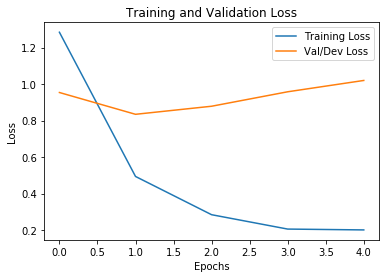

In [12]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Val/Dev Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

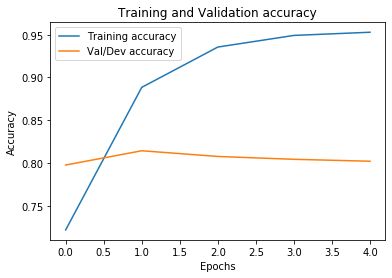

In [16]:
plt.plot(history.history['acc'],label='Training accuracy')
plt.plot(history.history['val_acc'],label='Val/Dev accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# we can see the model has clearly overfit the data eventhough EarlyStopping but thatss not the point of the project and can try and optimize the parameeters of es and fit method.